In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# .plot(kind='hist')
# .hist()  - mentioned in course notes

### Notes
#### Plotting
- hist(): plot a histogram.
- Common Parameters:
    - x - the data you want to plot
    - bins - the number of bins or bin edges
    - range - lower and upper range of the bins
- Syntax: hist(x, bins=None, range=None)

### General Info
- Purpose:
    - Understanding the distribution of continuous numerical data by showing the frequency of data points within certain range or intervals (bins).
    - It can help reveal patterns like skewness, bimodality or normal distribution.
- Description: It's divided into equal-sized bins or intervals along the x-axis, and the height of each bar represents the frequency or count of data points falling within that bin range.
- Difference between bar charts:
    - Histograms displays continuous numerical data, bar charts represent categorical or discrete data.
    - X-axis on histogram represents the bins of the continuous variable, while a bar chart represents the discrete categories.
    - Histograms are used to visualize the distribution and frequency of a single continuous variable; bar charts are used to compare values or frequencies across different categories.

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


<Axes: ylabel='Frequency'>

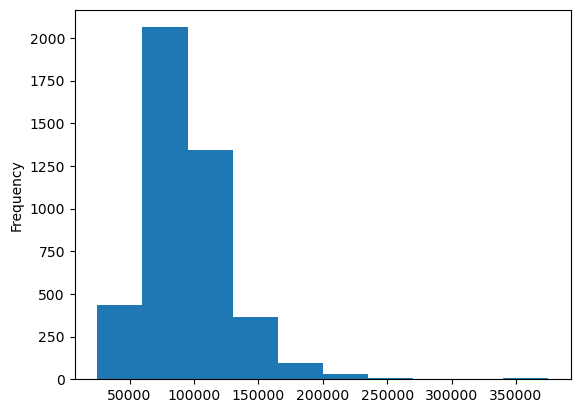

In [3]:
df_DA_US['salary_year_avg'].plot(kind='hist')

<Axes: ylabel='Frequency'>

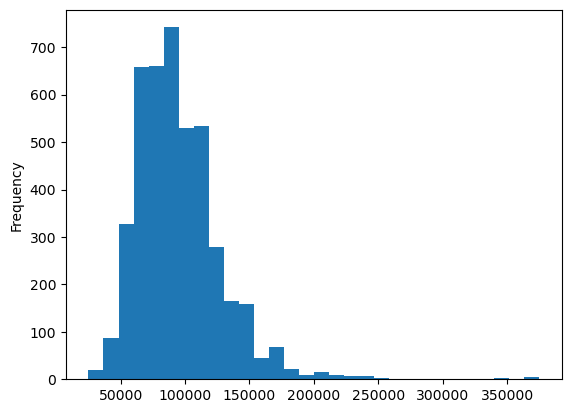

In [4]:
#Can specify a larger number of bins
#30 made the bins a lot smaller. We can see alot of the things within the dataset
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30 )

<Axes: ylabel='Frequency'>

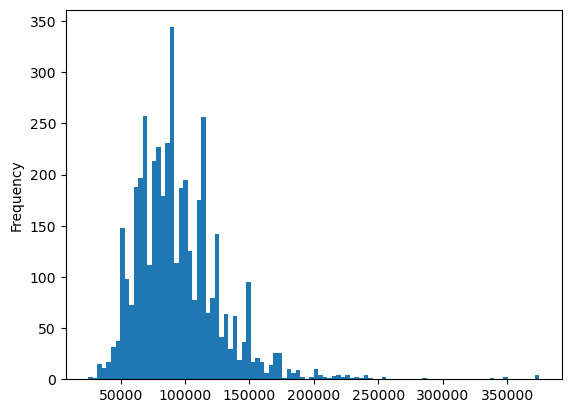

In [5]:
#But if we go too big of a number, we're going to start to see a bunch of ups and downs, and it's not going to tell us as much as we want it to
df_DA_US['salary_year_avg'].plot(kind='hist', bins=100 )

<Axes: ylabel='Frequency'>

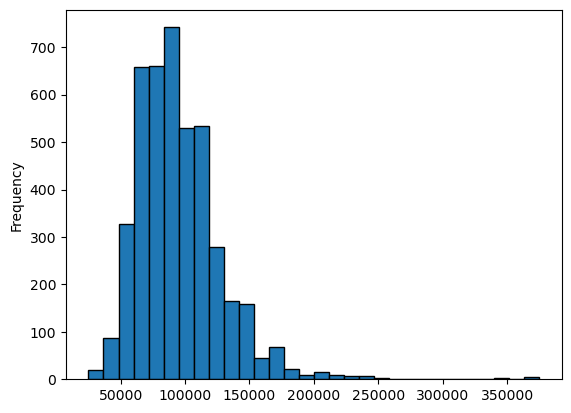

In [6]:
#Adding an edge around each bin
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black'  )

(0.0, 250000.0)

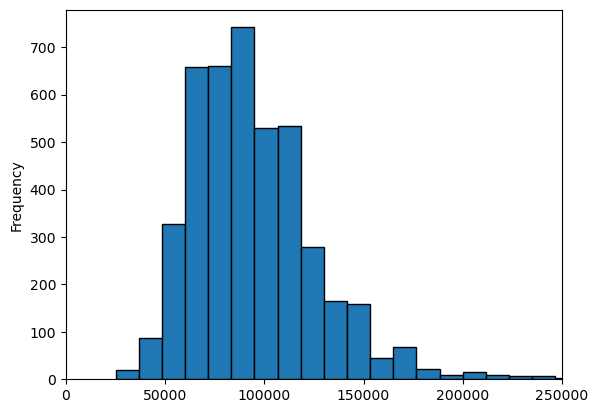

In [7]:
#Now, we want to clean it up
#On the x axix, we have a pretty long tail and and outlier. Most value is found before 300000
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

(0.0, 250000.0)

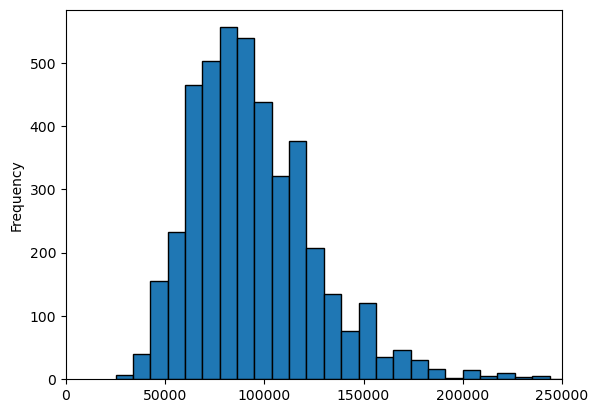

In [8]:
#We can see better
#We can even boost up the numbers on bins
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

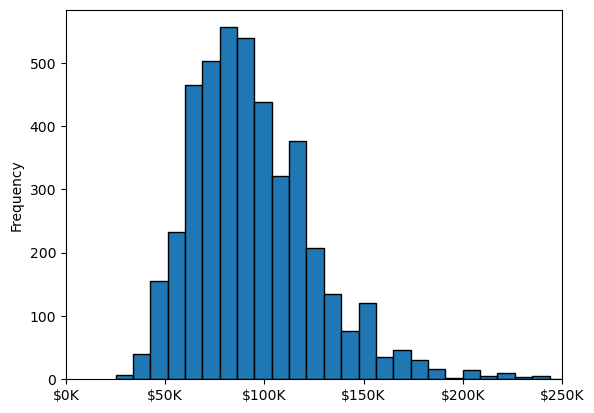

In [9]:
#Now, we want to format the x-axis
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

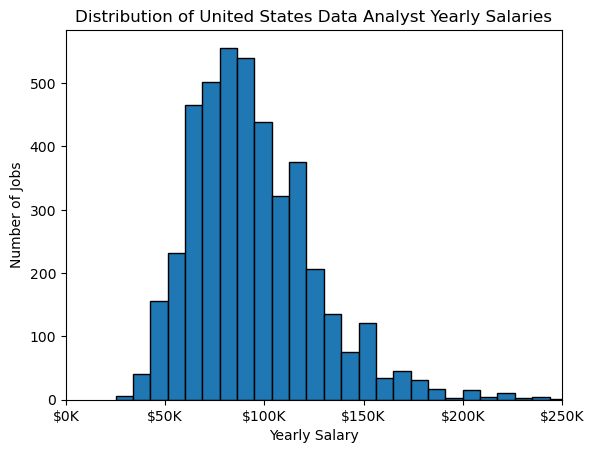

In [10]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

___

## Course Practice Problems

Create a histogram to show the distribution of hourly salaries (use salary_hour_avg column) for Data Scientist job postings:

- Create a new DataFrame called df_DS to filter out 'Data Scientist' jobs.
- Customize the plot by setting the number of bins to 40 and the bar color to blue.
- Label the x-axis as 'Hourly Salary' and the y-axis as 'Number of Jobs'.

(2.17.1)

    Use the DataFrames plot() method and set the bins parameter to 40 and the color parameter to 'blue'.

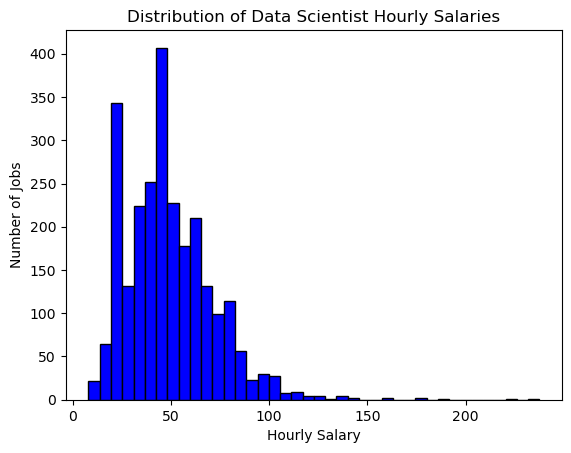

In [11]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')

plt.title('Distribution of Data Scientist Hourly Salaries')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.show()

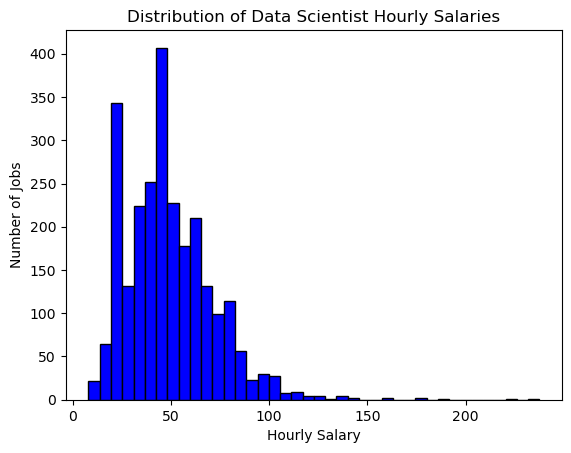

In [12]:
#Course Solution:

df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

# Plot the histogram
df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='blue', edgecolor='black')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Scientist Hourly Salaries')
plt.show()

Create a histogram to show the distribution of job postings by the number of skills listed using the job_skills column:

- Create a new DataFrame called df_skills to filter out job postings with non-null job_skills.
- Customize the plot by setting the number of bins to 55, the bar color to 'magenta'
- Add a title 'Distribution of Job Postings by Number of Skills Listed'.
- Label the x-axis as 'Number of Skills' and the y-axis as 'Number of Job Postings'.

(2.17.2)

    Use the DataFrames plot() method and set the bins parameter to 55, the color parameter to 'magenta', and edgecolor to 'black'.

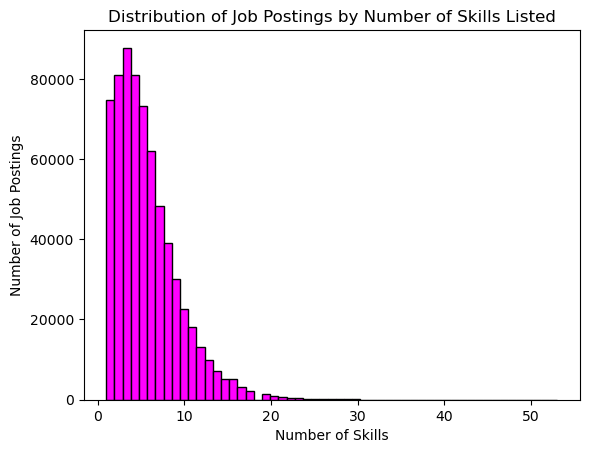

In [18]:
df_skills = df.dropna(subset='job_skills').copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()


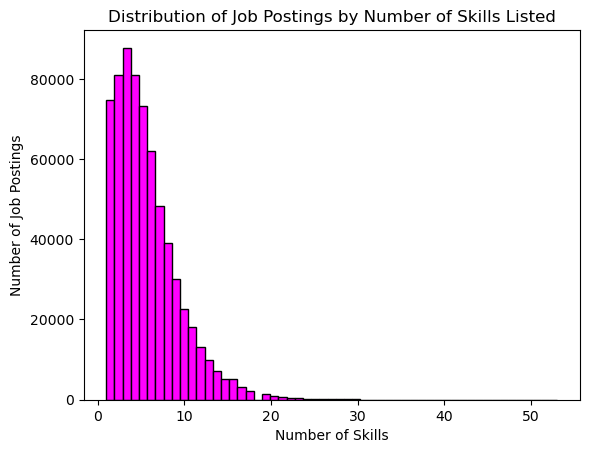

In [20]:
df_skills = df.dropna(subset='job_skills').copy()
df_skills['num_skills'] = df_skills['job_skills'].str.len()
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')

plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.show()

In [24]:
df_skills['num_skills'] = df_skills['job_skills'].apply(len)
df_skills['num_skills']

1          6
2          9
3          8
4          9
5          3
          ..
785736     8
785737     4
785738     2
785739    17
785740     2
Name: num_skills, Length: 668704, dtype: int64

In [25]:
df_skills['num_skills'] = df_skills['job_skills'].str.len()
df_skills['num_skills']

1          6
2          9
3          8
4          9
5          3
          ..
785736     8
785737     4
785738     2
785739    17
785740     2
Name: num_skills, Length: 668704, dtype: int64

Create a histogram to show the distribution of average yearly salaries (salary_year_avg) for Data Engineer job postings:

- Create a new DataFrame called df_DE to filter out 'Data Engineer' jobs.
- Customize the plot by setting the number of bins to 50, the bar color to red
- Add annotations for the mean and median salaries, using plt.axvline(); for the parameters specify:
    - color: 'blue'/'green'
    - linestyle: 'dashed'
    - label: e.g., f'Mean: ${mean_salary:,.0f}'
- Label the x-axis as 'Yearly Salary' and the y-axis as 'Number of Jobs'.

(2.17.3)

    Use the DataFrames plot() method and set the bins parameter to 50 and the color parameter to 'red'. Use plt.axvline() to add annotations for the mean and median salaries.

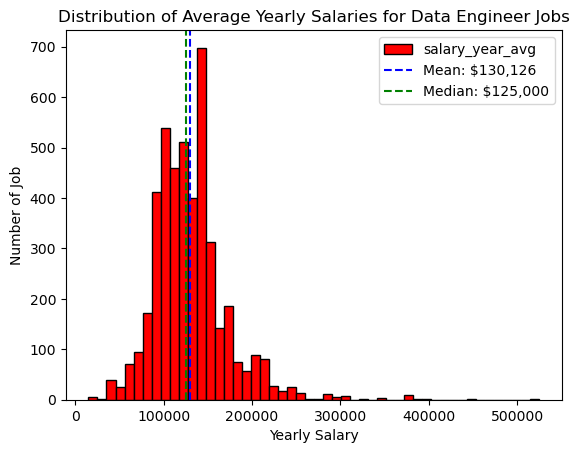

In [29]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
DE_mean_salary = df_DE['salary_year_avg'].mean()
DE_median_salary = df_DE['salary_year_avg'].median()

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.axvline(DE_mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${DE_mean_salary:,.0f}')
plt.axvline(DE_median_salary, color='green', linestyle='dashed', label=f'Median: ${DE_median_salary:,.0f}')
plt.title('Distribution of Average Yearly Salaries for Data Engineer Jobs')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Job')
plt.legend()
plt.show()